In [22]:
import pandas as pd
query = f"""
            SELECT domain, entity_id, state, last_changed, attributes
            FROM states
            WHERE
                domain IN ('binary_sensor')
                AND
                entity_id IS 'binary_sensor.overloop_on_off'
            ORDER BY last_changed DESC
            """
df = pd.read_sql_query(query, 'sqlite:////config/home-assistant_v2.db')

In [48]:
df.sort_values('last_changed', inplace=True)
df

,domain,entity_id,state,last_changed,attributes
2563,binary_sensor,binary_sensor.overloop_on_off,unavailable,2021-01-03 20:27:11.064598,"{""restored"": true, ""supported_features"": 0, ""d..."
2562,binary_sensor,binary_sensor.overloop_on_off,off,2021-01-03 20:27:26.676924,"{""friendly_name"": ""Overloop beweging on_off"", ..."
2561,binary_sensor,binary_sensor.overloop_on_off,on,2021-01-03 20:31:35.044197,"{""friendly_name"": ""Overloop beweging on_off"", ..."
2560,binary_sensor,binary_sensor.overloop_on_off,off,2021-01-03 20:34:35.040478,"{""friendly_name"": ""Overloop beweging on_off"", ..."
2559,binary_sensor,binary_sensor.overloop_on_off,on,2021-01-03 21:04:08.365312,"{""friendly_name"": ""Overloop beweging on_off"", ..."
...,...,...,...,...,...
4,binary_sensor,binary_sensor.overloop_on_off,off,2021-02-07 15:39:47.930889,"{""friendly_name"": ""Overloop beweging on_off"", ..."
3,binary_sensor,binary_sensor.overloop_on_off,on,2021-02-07 15:52:27.646544,"{""friendly_name"": ""Overloop beweging on_off"", ..."
2,binary_sensor,binary_sensor.overloop_on_off,off,2021-02-07 15:55:27.643563,"{""friendly_name"": ""Overloop beweging on_off"", ..."
1,binary_sensor,binary_sensor.overloop_on_off,on,2021-02-07 16:10:25.189464,"{""friendly_name"": ""Overloop beweging on_off"", ..."


In [49]:
df['state'].value_counts()

off            1269
on             1264
unavailable      31
Name: state, dtype: int64

In [50]:
(df['state'] == 'on').diff().value_counts()

True     2528
False      35
Name: state, dtype: int64

Text(0.5, 8.95999999999998, 'Minutes')

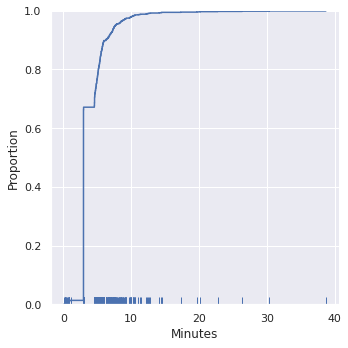

In [77]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.displot((pd.to_datetime(df['last_changed']).diff()[df['state'] == 'off']).dt.seconds / 60, kind='ecdf', rug=True)
import matplotlib.pyplot as plt
plt.xlabel('Minutes')